In [61]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [62]:
path_scene_camera='../data/scene_from_camera.jpg'
path_scene_spytnik='../data/scene_from_satelite.png'

In [63]:
scene_camera=cv2.imread(path_scene_camera)
scene_spytnik=cv2.imread(path_scene_spytnik)

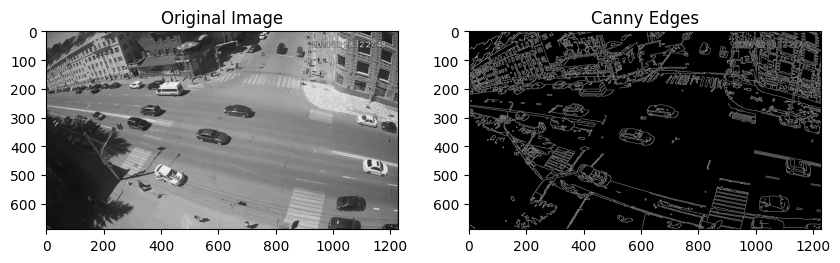

In [73]:
# Загрузка изображения
image = cv2.imread('../data/scene_from_camera.jpg', cv2.IMREAD_GRAYSCALE)

# Применение гауссова размытия для подавления шума
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Применение алгоритма Канни
low_threshold = 10  # Нижний порог
high_threshold = 100  # Верхний порог
edges = cv2.Canny(blurred, low_threshold, high_threshold)

# Отображение результатов
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')

plt.show()


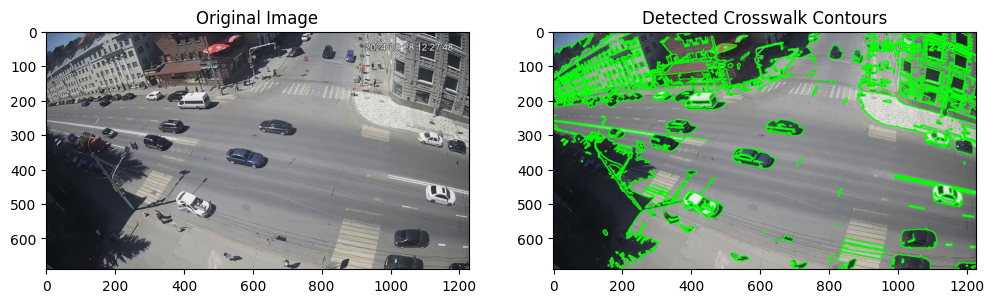

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('../data/scene_from_camera.jpg')

# Преобразование изображения в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение размытия для снижения шума
blurred = cv2.GaussianBlur(gray, (5, 5), 1.5)

# Применение преобразования Канни для выделения границ
edges = cv2.Canny(blurred, 50, 150)

# Поиск контуров
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Рисование найденных контуров на копии изображения
result = image.copy()
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

# Отображение исходного изображения и результата
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Detected Crosswalk Contours")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()


In [83]:
import cv2
import numpy as np

# Глобальные переменные для хранения точек
points = []

# Функция для рисования линий
def draw_line(event, x, y, flags, param):
    global points
    
    if event == cv2.EVENT_LBUTTONDOWN:  # Если кликнули левой кнопкой мыши
        points.append((x, y))  # Добавляем точку в список
        if len(points) > 1:
            # Рисуем линию между текущей и предыдущей точками
            cv2.line(image, points[-2], points[-1], (0, 255, 0), 2)
        
        # Отображаем текущие точки
        cv2.circle(image, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow("Draw Outline", image)  # Показываем обновленное изображение

# Загрузка изображения
image = cv2.imread('../data/scene_from_camera.jpg')

# Окно для рисования
cv2.imshow("Draw Outline", image)

# Установка обработчика событий для рисования
cv2.setMouseCallback("Draw Outline", draw_line)

# Ожидаем, пока пользователь не завершит рисование (кликает по точкам)
cv2.waitKey(0)
cv2.destroyAllWindows()

# После завершения рисования можно показать координаты точек
print("Coordinates of points: ", points)

# Если нужно, можно нарисовать замкнутый контур
if len(points) > 1:
    cv2.polylines(image, [np.array(points)], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.imshow("Final Image with Outline", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Coordinates of points:  [(305, 507), (820, 687), (923, 268), (553, 181), (309, 501)]


(305, 507), (820, 687), (923, 268), (553, 181)

In [84]:
import numpy as np
import cv2
from scipy.optimize import least_squares

# Пример точек на изображении с камеры (x, y) и на спутниковом снимке (X, Y)
pts_image = np.array([[100, 200], [200, 300], [300, 400], [400, 500]], dtype=np.float32)
pts_satellite = np.array([[10, 20], [20, 30], [30, 40], [40, 50]], dtype=np.float32)

# Функция ошибки для оптимизации
def residuals(params, pts_image, pts_satellite):
    # Извлекаем параметры преобразования (матрицу 3x3)
    H = np.array(params).reshape(3, 3)
    
    # Преобразуем все точки с изображения камеры с использованием H
    pts_image_homogeneous = np.hstack([pts_image, np.ones((pts_image.shape[0], 1))])  # превращаем в гомогенные координаты
    transformed_pts = np.dot(pts_image_homogeneous, H.T)  # применяем преобразование
    
    # Нормализуем преобразованные координаты
    transformed_pts = transformed_pts[:, :2] / transformed_pts[:, 2, np.newaxis]
    
    # Ошибка между преобразованными точками и реальными точками на спутниковом снимке
    return (transformed_pts - pts_satellite).flatten()

# Начальная гомография (можно начать с единичной матрицы или приближенной матрицы)
initial_H = np.eye(3).flatten()

# Оптимизация с использованием least_squares
result = least_squares(residuals, initial_H, args=(pts_image, pts_satellite))

# Извлекаем оптимизированную матрицу гомографии
optimized_H = result.x.reshape(3, 3)

print("Оптимизированная матрица гомографии H:", optimized_H)


ModuleNotFoundError: No module named 'scipy'